### 1. Import Dependecies

In [63]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Load Data

In [64]:
df = pd.read_csv('data/processed/Missing_Values_Handled.csv')
df.head()

,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


### 3. Outlier Detection techniques

#### 3.1 Distribution plots

In [65]:
df.nunique()

Platform               4
Hashtag               10
Content_Type           6
Region                 8
Views               4996
Likes               4972
Shares              4877
Comments            4735
Engagement_Level       3
dtype: int64

In [66]:
numerical_columns = ['Views', 'Likes', 'Shares', 'Comments']
categorical_columns = ['Platform', 'Hashtag', 'Content_Type', 'Region', 'Engagement_Level']

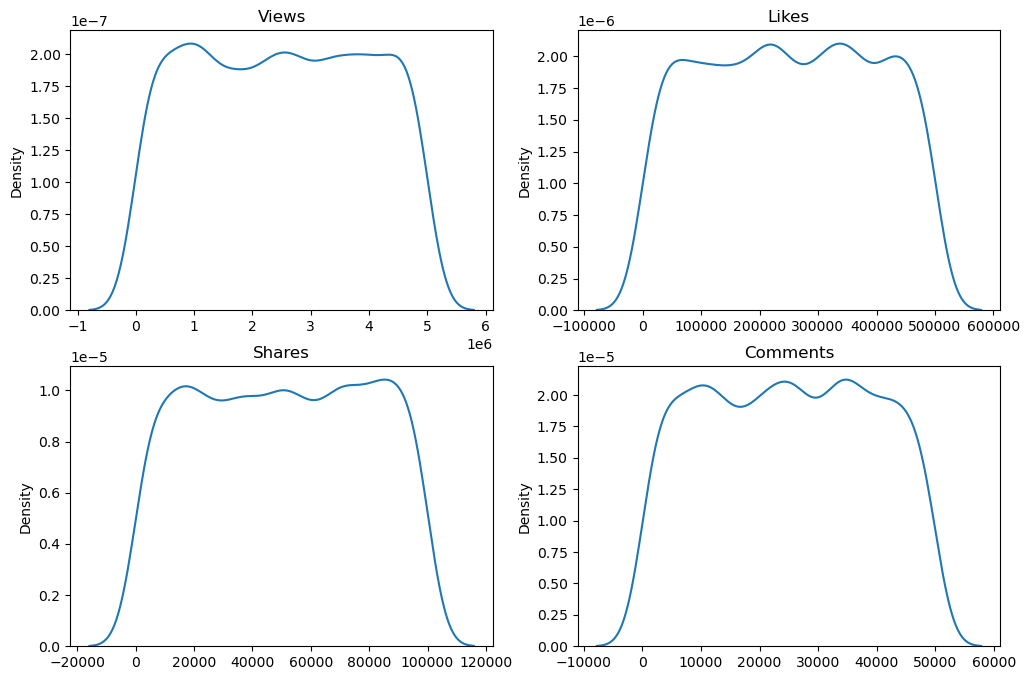

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for idx,col in enumerate(numerical_columns):
        sns.kdeplot(
                    data=df[col],
                    ax=axes[idx]
                    )
        axes[idx].set_title(col)
        axes[idx].set_xlabel('')

#### 3.2 Pie plots

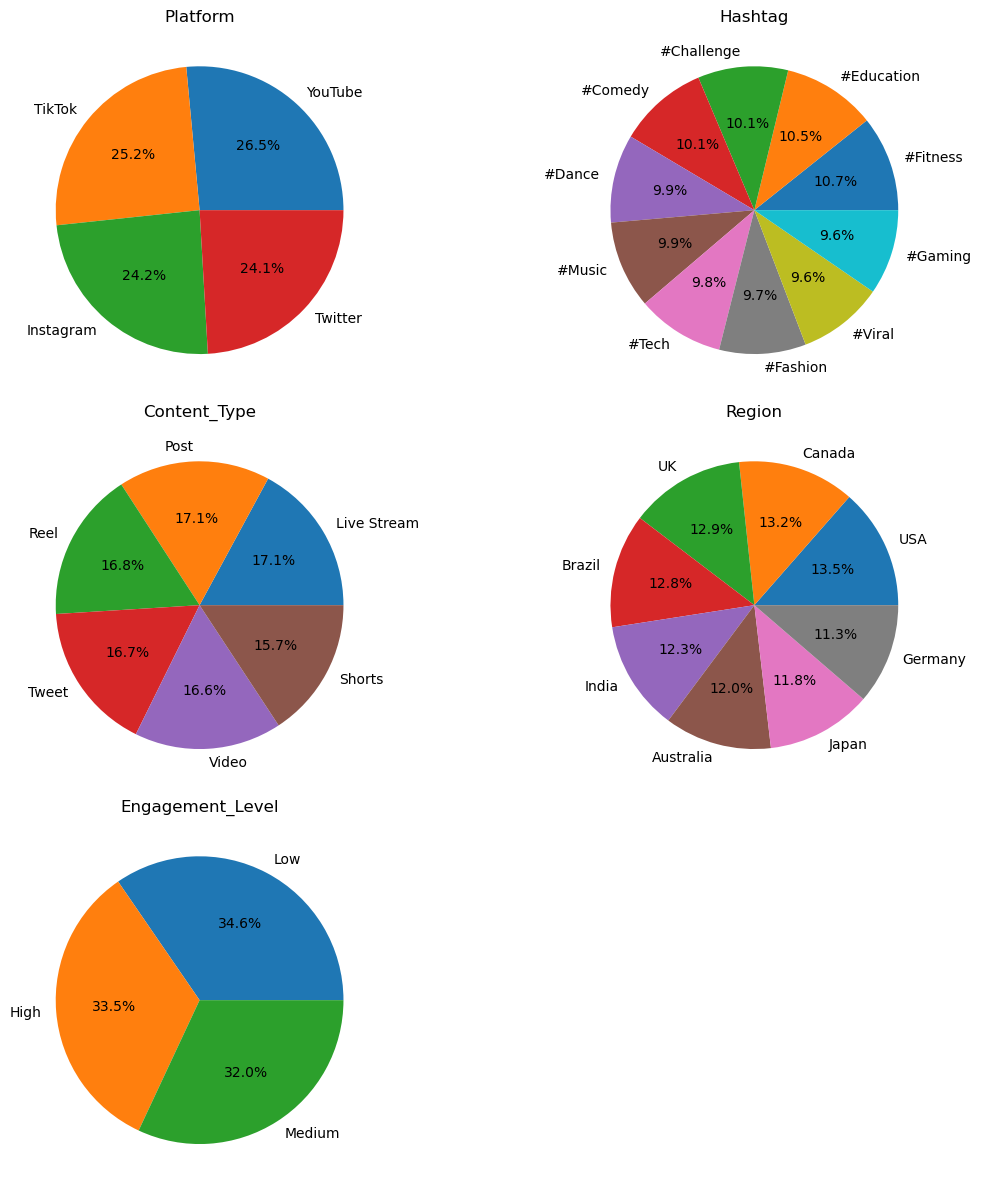

In [68]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten() 

for idx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        ax=axes[idx]
    )
    axes[idx].set_title(col)
    axes[idx].set_ylabel('')

# Hide any unused subplot (the 6th one)
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### 3.3 Box Plots

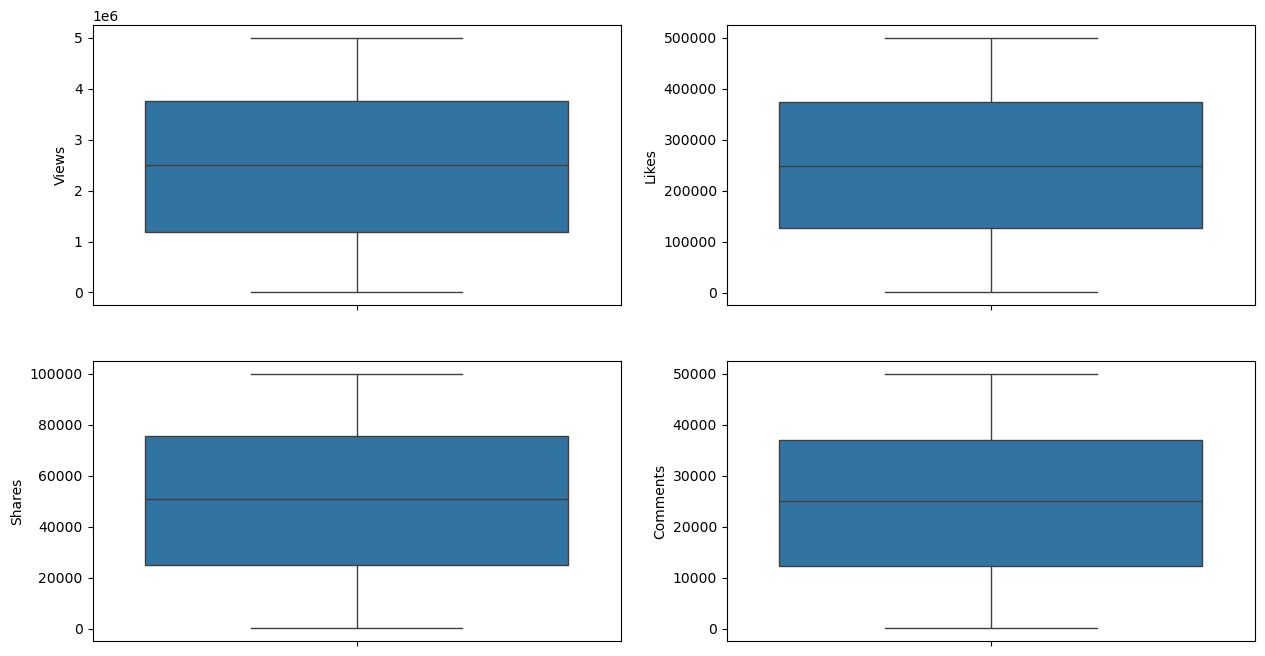

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

sns.boxplot(data=df['Views'], ax=axes[0,0])
sns.boxplot(data=df['Likes'], ax=axes[0,1])
sns.boxplot(data=df['Shares'], ax=axes[1,0])
sns.boxplot(data=df['Comments'], ax=axes[1,1])

plt.show()

#### 3.4 empirical rule / 3-sigma rule

In [70]:
def find_anomaly(data):
    mean = data.mean()
    std = data.std()

    upper_bound = mean + (3 * std)
    lower_bound = mean - (3 * std)

    return (data > upper_bound) | (data < lower_bound)

In [71]:
for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers / len(df), 3)
    print(f"{col} : {n_outliers} outliers ({n_outlier_percentage} %)")

Views : 0 outliers (0.0 %)
Likes : 0 outliers (0.0 %)
Shares : 0 outliers (0.0 %)
Comments : 0 outliers (0.0 %)


#### 3.5 IQR Method

In [72]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1 

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR 

    return (data > upper_bound) | (data < lower_bound)

In [73]:
for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers / len(df), 3)
    print(f"{col} : {n_outliers} outliers ({n_outlier_percentage} %)")

Views : 0 outliers (0.0 %)
Likes : 0 outliers (0.0 %)
Shares : 0 outliers (0.0 %)
Comments : 0 outliers (0.0 %)
